In [1]:
import numpy as np
import yaml
import matplotlib.pyplot as plt

#Import pyRTC classes
from pyRTC.hardware.predictLoop import *

#Import hardware classes
from pyRTC.hardware.OOPAOInterface import *
from pyRTC.SlopesProcess import *



     °          *      *      
 ▄██▄   ▄██▄  ▄███▄   ▄██▄ * ▄██▄ 
██* ██ ██  ██ ██  ██ ██  ██ ██  ██
██  ██ ██° ██ ██  ██ ██* ██ ██  ██
██  ██ ██  ██ ████▀  ██▄▄██ ██  ██
██* ██ ██  ██ ██     ██▀▀██ ██  ██
██  ██ ██  ██ ██ *   ██  ██ ██* ██
 ▀██▀   ▀██▀  ██   ° ██  ██  ▀██▀ 
      *         *             


**************************************************************************************************************************************************************
NUMPY WARNING: mkl blas not found! Multi-threading may not work as expected.
**************************************************************************************************************************************************************


In [2]:
# Load the configuration file
def read_yaml_file(file_path):
    with open(file_path, 'r') as file:
        conf = yaml.safe_load(file)
    return conf

conf = read_yaml_file("simconfig.yaml")
confLoop = conf["loop"]
confWFS = conf["wfs"]
confWFC = conf["wfc"]
confPSF = conf["psf"]
confSlopes = conf["slopes"]

print(confLoop)
print(confWFS)
print(confWFC)
print(confPSF)
print(confSlopes)

{'gain': 0.1, 'numDroppedModes': 30, 'pokeAmp': 0.02, 'numItersIM': 1, 'affinity': 2, 'delay': 2, 'method': 'push-pull', 'functions': ['standardIntegrator']}
{'name': 'OOPAOWFS', 'binning': 2, 'exposure': 2000, 'gain': 0, 'bitDepth': 10, 'left': 0, 'top': 0, 'width': 48, 'height': 48, 'darkCount': 1000, 'affinity': 3, 'flatNorm': False, 'functions': ['expose']}
{'name': 'OOPAOWFC', 'numActuators': 356, 'numModes': 356, 'flatFile': '', 'saveFile': '', 'm2cFile': '', 'affinity': 5, 'commandCap': 0.8, 'hardwareDelay': 0.001, 'frameDelay': 0, 'functions': ['sendToHardware']}
{'name': 'OOPAOPSF', 'index': 0, 'exposure': 80, 'gain': 0, 'bitDepth': 16, 'left': 0, 'top': 0, 'width': 128, 'height': 128, 'darkCount': 1000, 'integration': 500000, 'affinity': 6, 'functions': ['expose', 'integrate']}
{'type': 'PYWFS', 'signalType': 'slopes', 'subApSpacing': 4, 'subApOffsetX': 0, 'subApOffsetY': 0, 'affinity': 4, 'flatNorm': False, 'functions': ['computeSignal']}


In [3]:
# Create the OOPAO simulation
sim = OOPAOInterface(conf=conf, param=None)
dm, wfs, psf, slopes = sim.initializeSimulation()

Reading/Writting calibration data from data_calibration/
Writting output data in data_cl/
Opening Existing Shared Memory Object wfsRaw
Opening Existing Shared Memory Object wfsRaw_meta
Opening Existing Shared Memory Object wfs
Opening Existing Shared Memory Object wfs_meta
Opening Existing Shared Memory Object wfc
Opening Existing Shared Memory Object wfc_meta
Opening Existing Shared Memory Object psfShort
Opening Existing Shared Memory Object psfShort_meta
Opening Existing Shared Memory Object psfLong
Opening Existing Shared Memory Object psfLong_meta
Opening Existing Shared Memory Object wfs_meta
Closing wfs_meta
Opening Existing Shared Memory Object wfs
Opening Existing Shared Memory Object wfs_meta
Opening Existing Shared Memory Object signal
Opening Existing Shared Memory Object signal_meta
Opening Existing Shared Memory Object slopemap
Opening Existing Shared Memory Object slopemap_meta
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% TELESCOPE %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
     Diameter         

In [4]:
# Start the Processes
dm.start()
dm.flatten()

wfs.start()
slopes.start()
psf.start()


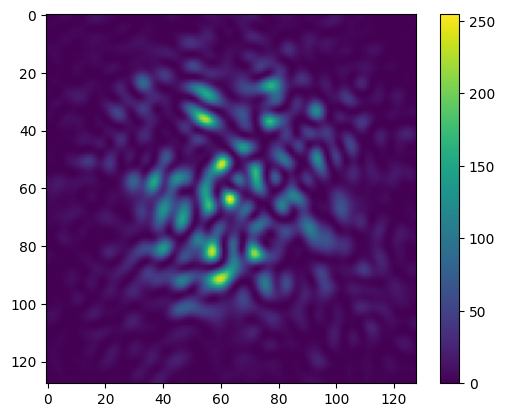

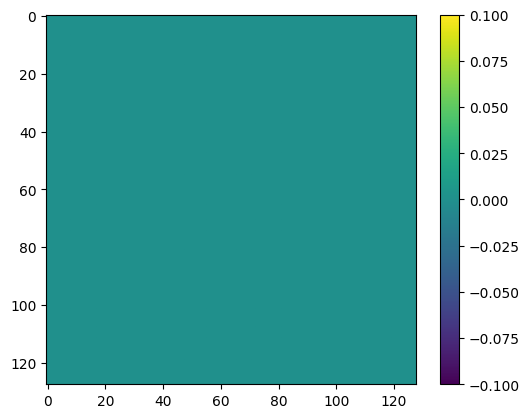

In [5]:
# # # Show initial PSF

slopes.tel.computePSF(5, N_crop=136)

plt.imshow((255.*psf.tel.PSF_norma_zoom).astype(np.uint16).astype(np.float32))
plt.colorbar()
plt.show()
plt.imshow(psf.dark)
plt.colorbar()
plt.show()
# slopes.tel.PSF_norma.shape

In [7]:
sim.removeAtmosphere()

loop = Loop(conf)
loop.computeIM()

sim.addAtmosphere()


Telescope and Atmosphere separated!
Opening Existing Shared Memory Object signal_meta
Closing signal_meta
Opening Existing Shared Memory Object signal
Opening Existing Shared Memory Object signal_meta
Opening Existing Shared Memory Object wfc_meta
Closing wfc_meta
Opening Existing Shared Memory Object wfc
Opening Existing Shared Memory Object wfc_meta
Telescope and Atmosphere combined!


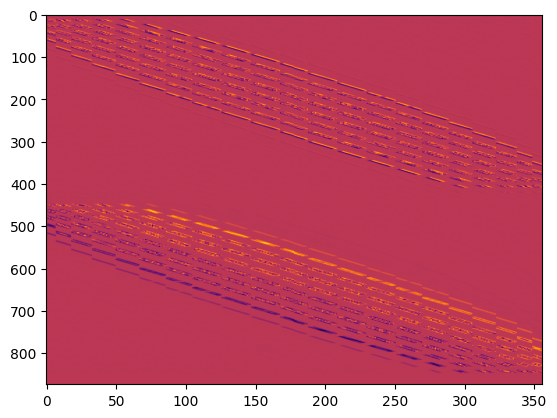

In [8]:
loop.plotIM()

In [ ]:
loop.setGain(0.6)
psf.start()
loop.start()
time.sleep(10)
loop.stop()
psf.stop()

In [ ]:
plt.imshow(sim.wfs.signal_2D)
plt.colorbar()
plt.show()

plt.imshow(slopes.signal2D.read_noblock_safe())
plt.colorbar()
plt.show()

In [ ]:
loop.gain